In [1]:
import config as CONFIG
import sys
sys.path.append(CONFIG.GLOBAL_MODEL_PATH)
from models.mwunet import mwunet

from csbdeep.io import load_training_data
from csbdeep.utils import plot_history, plot_some
from matplotlib import pyplot as plt

# Load Data

In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data(CONFIG.TRAIN_DATASET_PATH, validation_split=0.1, axes='SCYX', verbose=True)

number of training images:	 22852
number of validation images:	 2539
image size (2D):		 (128, 128)
axes:				 SYXC
channels in / out:		 2 / 2


# Define Model

In [3]:
model = mwunet(input_shape=Y.shape[1:], output_shape=X.shape[1:], 
                conv_kernel_size=5, n_conv_per_scale=2, n_filters_per_scale=[64, 128, 256])
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             [(None, 128, 128, 2) 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 64, 128, 2)   0           Inputs[0][0]                     
__________________________________________________________________________________________________
tf.math.truediv (TFOpLambda)    (None, 64, 128, 2)   0           tf.__operators__.getitem[0][0]   
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 64, 128, 2)   0           Inputs[0][0]                     
______________________________________________________________________________________________

# Train

In [4]:
history = model.train(X=Y, Y=X, validation_data=(Y_val, X_val),
                      train_epochs=200, train_batch_size=32,
                      train_learning_rate=0.001,
                      base_dir=CONFIG.CHECKPOINT_PATH,
                      name='DX',
                      train_checkpoint='DX.hdf5'
                      )

Epoch 1/200
715/715 [==============================] - 92s 111ms/step - loss: 0.0686 - mse: 0.0094 - val_loss: 0.0731 - val_mse: 0.0101

Epoch 00001: val_loss improved from inf to 0.07306, saving model to ./checkpoint\DX\DX.hdf5
Epoch 2/200
715/715 [==============================] - 74s 103ms/step - loss: 0.0657 - mse: 0.0086 - val_loss: 0.0646 - val_mse: 0.0085

Epoch 00002: val_loss improved from 0.07306 to 0.06457, saving model to ./checkpoint\DX\DX.hdf5
Epoch 3/200
715/715 [==============================] - 71s 99ms/step - loss: 0.0643 - mse: 0.0082 - val_loss: 0.0639 - val_mse: 0.0082

Epoch 00003: val_loss improved from 0.06457 to 0.06388, saving model to ./checkpoint\DX\DX.hdf5
Epoch 4/200
715/715 [==============================] - 71s 99ms/step - loss: 0.0636 - mse: 0.0081 - val_loss: 0.0631 - val_mse: 0.0079

Epoch 00004: val_loss improved from 0.06388 to 0.06305, saving model to ./checkpoint\DX\DX.hdf5
Epoch 5/200
715/715 [==============================] - 71s 99ms/step - los

['loss', 'lr', 'mse', 'val_loss', 'val_mse']


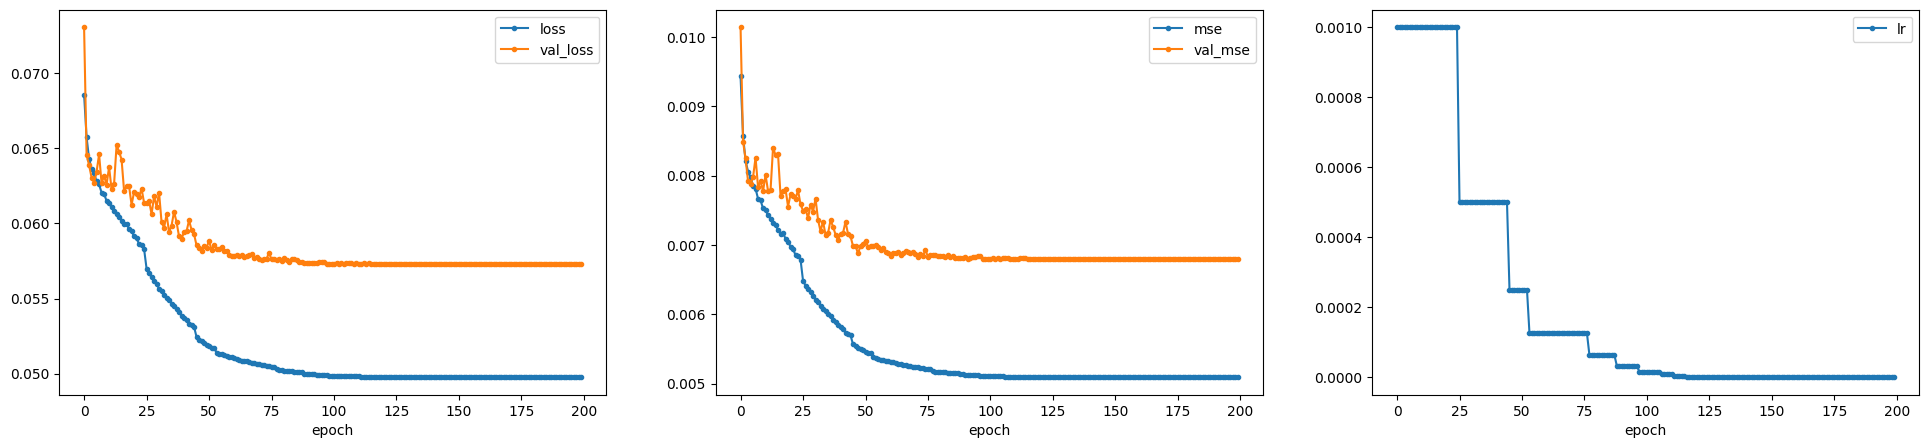

In [5]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(24,5))
plot_history(history, ['loss', 'val_loss'], ['mse', 'val_mse'], ['lr'])

# Validation

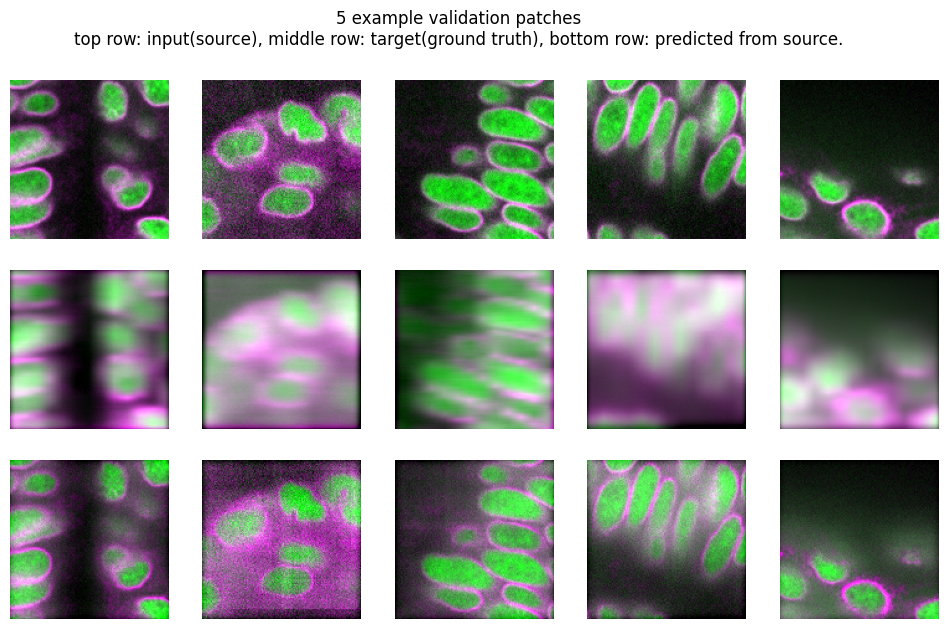

In [6]:
plt.figure(figsize=(12,7))
predict_res = model.predict(Y_val[:5])
plot_some(Y_val[:5], X_val[:5], predict_res, pmax=99.5)
plt.suptitle('5 example validation patches\n'
             'top row: input(source), '
             'middle row: target(ground truth), '
             'bottom row: predicted from source.')
plt.show()